In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_excel('Election_Data.xlsx')

In [3]:
data

,Unnamed: 0,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,1,Labour,43,3,3,4,1,2,2,female
1,2,Labour,36,4,4,4,4,5,2,male
2,3,Labour,35,4,4,5,2,3,2,male
3,4,Labour,24,4,2,2,1,4,0,female
4,5,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...,...
1520,1521,Conservative,67,5,3,2,4,11,3,male
1521,1522,Conservative,73,2,2,4,4,8,2,male
1522,1523,Labour,37,3,3,5,4,2,2,male
1523,1524,Conservative,61,3,3,1,4,11,2,male


In [4]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [5]:
data

,vote,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge,gender
0,Labour,43,3,3,4,1,2,2,female
1,Labour,36,4,4,4,4,5,2,male
2,Labour,35,4,4,5,2,3,2,male
3,Labour,24,4,2,2,1,4,0,female
4,Labour,41,2,2,1,1,6,2,male
...,...,...,...,...,...,...,...,...,...
1520,Conservative,67,5,3,2,4,11,3,male
1521,Conservative,73,2,2,4,4,8,2,male
1522,Labour,37,3,3,5,4,2,2,male
1523,Conservative,61,3,3,1,4,11,2,male


In [6]:
data.shape

(1525, 9)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1525 entries, 0 to 1524
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   vote                     1525 non-null   object
 1   age                      1525 non-null   int64 
 2   economic.cond.national   1525 non-null   int64 
 3   economic.cond.household  1525 non-null   int64 
 4   Blair                    1525 non-null   int64 
 5   Hague                    1525 non-null   int64 
 6   Europe                   1525 non-null   int64 
 7   political.knowledge      1525 non-null   int64 
 8   gender                   1525 non-null   object
dtypes: int64(7), object(2)
memory usage: 107.4+ KB


In [8]:
## numerical features

numerical_feature = [feature for feature in data.columns if data[feature].dtype != 'O']
numerical_feature

['age',
 'economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']

In [9]:
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique()) < 25]
discrete_feature

['economic.cond.national',
 'economic.cond.household',
 'Blair',
 'Hague',
 'Europe',
 'political.knowledge']

In [10]:
continuous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
continuous_feature

['age']

In [11]:
## categorical features

categorical_feature = [feature for feature in data.columns if data[feature].dtype == 'O']
categorical_feature

['vote', 'gender']

In [12]:
cat = []
for category in categorical_feature:
        cat.append(data[category].unique())
cat

[array(['Labour', 'Conservative'], dtype=object),
 array(['female', 'male'], dtype=object)]

In [13]:
## Descriptive analysis

In [14]:
## mean

data[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']].mean()

age                        54.182295
economic.cond.national      3.245902
economic.cond.household     3.140328
Blair                       3.334426
Hague                       2.746885
Europe                      6.728525
political.knowledge         1.542295
dtype: float64

In [15]:
## median

data[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']].median()

age                        53.0
economic.cond.national      3.0
economic.cond.household     3.0
Blair                       4.0
Hague                       2.0
Europe                      6.0
political.knowledge         2.0
dtype: float64

In [16]:
## mode

data[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']].mode()

,age,economic.cond.national,economic.cond.household,Blair,Hague,Europe,political.knowledge
0,37,3,3,4,2,11,2


In [17]:
## standard deviation

data[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']].std()

age                        15.711209
economic.cond.national      0.880969
economic.cond.household     0.929951
Blair                       1.174824
Hague                       1.230703
Europe                      3.297538
political.knowledge         1.083315
dtype: float64

In [18]:
## variance

data[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']].var()

age                        246.842075
economic.cond.national       0.776107
economic.cond.household      0.864810
Blair                        1.380212
Hague                        1.514631
Europe                      10.873759
political.knowledge          1.173571
dtype: float64

In [19]:
## skew

data[['age', 'economic.cond.national', 'economic.cond.household', 'Blair', 'Hague', 'Europe', 'political.knowledge']].skew()

age                        0.144621
economic.cond.national    -0.240453
economic.cond.household   -0.149552
Blair                     -0.535419
Hague                      0.152100
Europe                    -0.135947
political.knowledge       -0.426838
dtype: float64

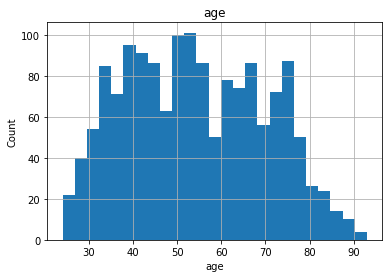

In [20]:
## Lets analyse the continuous values by creating histograms to understand the distribution

for feature in continuous_feature:
    dataset=data.copy()
    dataset[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

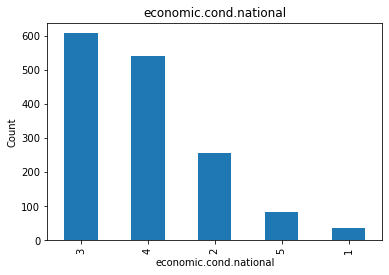

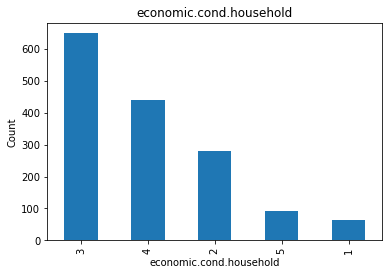

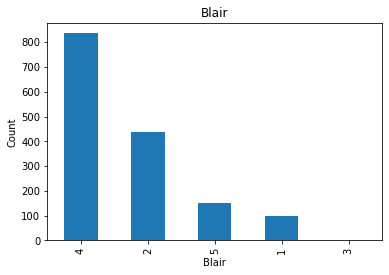

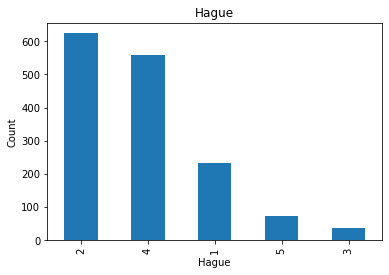

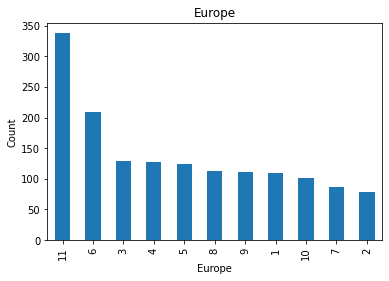

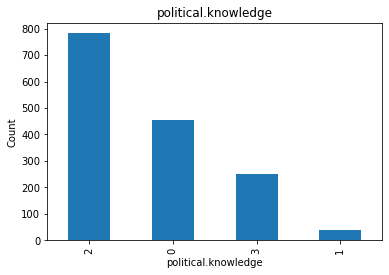

In [21]:
## Lets analyse the discrete values by creating histograms to understand the distribution

for feature in discrete_feature:
    dataset=data.copy()
    dataset[feature].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

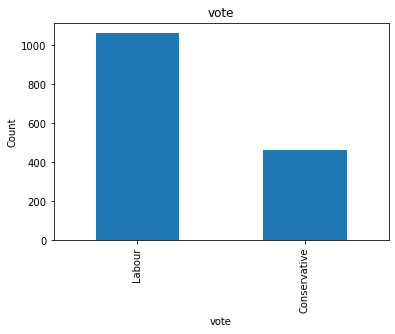

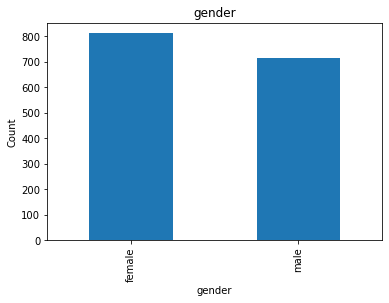

In [22]:
## Lets analyse the categorical values by creating histograms to understand the distribution

for feature in categorical_feature:
    dataset=data.copy()
    dataset[feature].value_counts().plot.bar()
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

Text(0.5, 1.0, 'Vote')

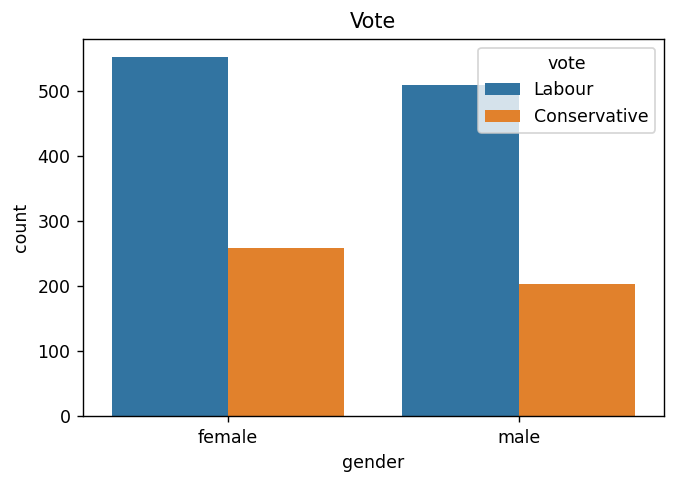

In [23]:
plt.figure(dpi=125)
sns.countplot(x = "gender",  hue = "vote", data =data).set_title('Vote')

Text(0.5, 1.0, 'Vote')

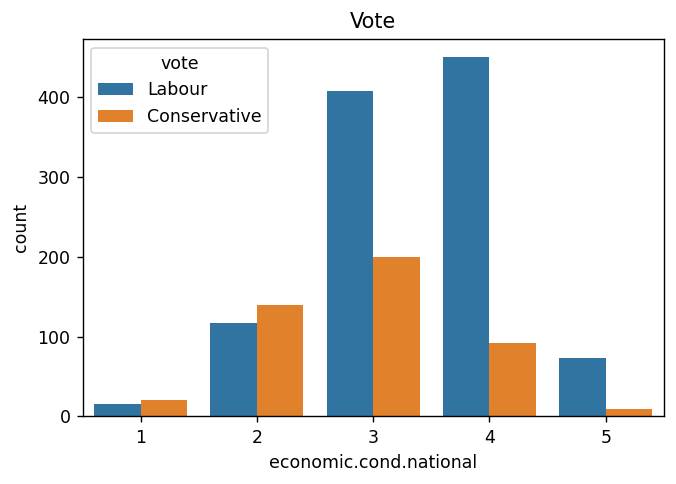

In [24]:
plt.figure(dpi=125)
sns.countplot(x = "economic.cond.national",  hue = "vote", data =data).set_title('Vote')

Text(0.5, 1.0, 'Vote')

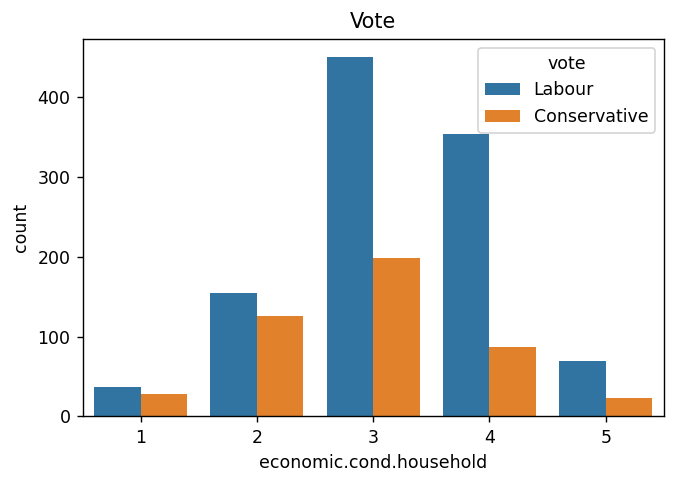

In [25]:
plt.figure(dpi=125)
sns.countplot(x = "economic.cond.household",  hue = "vote", data =data).set_title('Vote')

Text(0.5, 1.0, 'Vote')

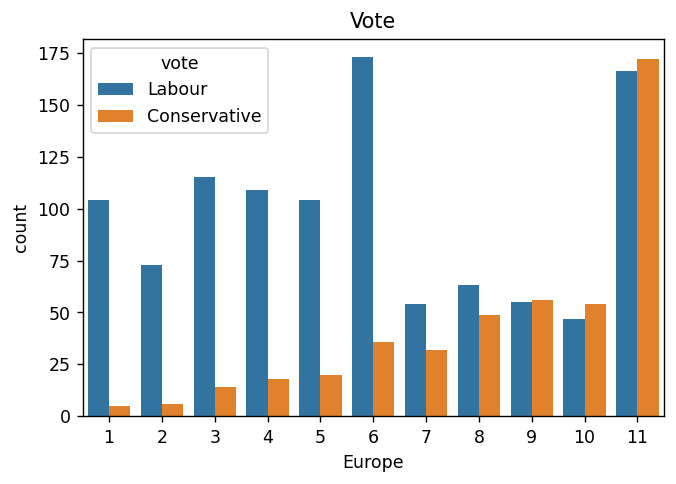

In [27]:
plt.figure(dpi=125)
sns.countplot(x = "Europe",  hue = "vote", data =data).set_title('Vote')